In [1]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import ast
from pathlib import Path

In [2]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [3]:

prompt1 = """
You are provided with a set of Lego blocks that are rectangular.
You are asked to build the letter 'E" on an 8 by 8 gird.
Each block occupies a segment [(x, y), (x, y)] that can extend only in 1 unit either horizontal or vertical. 
For example, [(0, 0), (0, 1)] is a valid segment. 
Once a point has been covered by a block, you can never use it again.  
Blocks that occupy [(0, 0), (0, 1)] and [(0, 2), (0, 3)] are valid as this would be two blocks next to each other.
Blocks that occupy [(0, 0), (0, 1)] and [(0, 1), (0, 1)] are not valid as this would have the blocks overlapping.
Diagonal blocks are not allowed.
The segments should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
For example, '[[(x, y), (x, y)], [(x, y), (x, y)]] ' is a correctly formatted list of segments.
"""

In [4]:
prompt2 = """
You are tasked with designing a pattern on a grid using plastic blocks to form a specified letter. 
Each plastic block occupies two (x,y) positions in size, for example [(0,0) , (0,1)].
The blocks have magnets that lock them onto the grid like Legos.

For this task, you need to form the letter 'E' on the grid. Provide the coordinates where each block should be placed to construct the letter. 
Each block should be placed either horizontally or vertically.

Ensure that:
1. The blocks are placed in such a way that they form the letter 'E'.
2. Each block is exactly two units long.
3. No two blocks overlap.
4. The blocks are not placed diagonally.
5. The coordinates are provided as pairs of x, y positions indicating the start and end points of each block.

Provide the coordinates in the format: [[(x1, y1), (x2, y2)], [(x3, y3), (x4, y4)], ...]. Do not include any additional text, just the list of coordinates.
"""

In [5]:
prompt3 = """
Determine coordinates to form a letter in an 10 by 10 grid. 
Provide only a list of points that make up a smile face.
Points can not be reused.
The coordinates should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
The coordinates should be in the format (x, y).
For example, '[(x, y), (x, y), (x,y)]' is a correctly formatted list.
"""

In [95]:
prompt4 = """
Determine coordinates to form a uppercase letter "S" in a 10 by 10 grid.
These coordinates will be used to build your design with bricks in the real world.
Determine these points one at a time to ensure they make sense, do not do it all at once.
Provide only a list of points that make up the design.
Points cannot be reused.
The coordinates should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
The coordinates should be in the format (x, y).
For example, '[(x, y), (x, y), (x, y)]' is a correctly formatted list.
Use chain of thought and confirm that the provided coordinates make sense.
If you need to, plot the points and check if they actually make the letter.
"""

In [108]:
import json

grid = {
    "grid": [
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", ".", "."]
    ]
}

prompt5 = f"""
You are given a 10x10 grid where each cell can be represented by coordinates (x, y). Each cell can either be empty or contain a block. Here is the grid in JSON format:
{json.dumps(grid)}

Your job is to decide how to build the letter "A" by placing blocks on the grid. 
Mark the positions you choose with an X on the grid. 
Return the grid when you are done. 
Also, provide a list of all coordinates with blocks in the format (x, y).
"""

# Send the request to OpenAI using the new ChatCompletion method
completion = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are an assistant designed to process grid information."},
        {"role": "user", "content": prompt5}
    ],
    temperature=0.2
)

# Print the completion result
print(completion)


ChatCompletion(id='chatcmpl-9eporYoqPITuL84IsMLeh83t0mhKf', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To build the letter "A", we can place blocks in the following positions:\n\n(1, 4), (2, 3), (3, 2), (4, 1), (5, 1), (6, 2), (7, 3), (8, 4), (4, 5), (5, 5), (6, 5)\n\nHere is the grid after placing the blocks:\n\n{\n"grid": [\n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."], \n[".", ".", ".", ".", "X", ".", ".", ".", ".", "."], \n[".", ".", ".", "X", ".", "X", ".", ".", ".", "."], \n[".", ".", "X", ".", ".", ".", "X", ".", ".", "."], \n[".", "X", ".", ".", ".", ".", ".", "X", ".", "."], \n[".", "X", ".", ".", "X", "X", ".", "X", ".", "."], \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."], \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."], \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."], \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."]\n]\n}\n\nAnd here is the list of all coordinates with blocks:\n\n[(1, 4), (2

In [ ]:
[\n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
 \n[".", ".", ".", ".", "X", ".", ".", ".", ".", "."],
 \n[".", ".", ".", "X", ".", "X", ".", ".", ".", "."],
 \n[".", ".", "X", ".", ".", ".", "X", ".", ".", "."],
 \n[".", "X", ".", ".", ".", ".", ".", "X", ".", "."],
 \n[".", "X", ".", ".", "X", "X", ".", "X", ".", "."],
 \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
 \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
 \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
 \n[".", ".", ".", ".", ".", ".", ".", ".", ".", "."]

In [105]:
print(completion)

ChatCompletion(id='chatcmpl-9epi2dlfjFkwyj5YR4Qn7S0z6XH4k', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Let\'s start by defining the top horizontal line of the "S". We can do this by creating a line of points from (1,9) to (8,9). This will give us:\n\n[(1,9), (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9)]\n\nNext, we need to create the top left curve of the "S". We can do this by adding the points (8,8), (8,7), (7,6), (6,6), (5,6), (4,6), (3,6), (2,6), (1,6).\n\nSo far, our list of points is:\n\n[(1,9), (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9), (8,8), (8,7), (7,6), (6,6), (5,6), (4,6), (3,6), (2,6), (1,6)]\n\nNext, we need to create the bottom left curve of the "S". We can do this by adding the points (1,5), (1,4), (2,3), (3,3), (4,3), (5,3), (6,3), (7,3), (8,3).\n\nOur list of points is now:\n\n[(1,9), (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9), (8,8), (8,7), (7,6), (6,6), (5,6), (4,6), (3,6), (2,6), (1,6), (1,5), 

In [96]:
# Define the prompt
prompt = prompt4

# Send the request to OpenAI using the new ChatCompletion method
completion = client.chat.completions.create(
    model="gpt-4o",
    temperature = 0.2,
    messages=[
        {"role": "system", "content": "You are an assistant designed to output coordinates for building structures."},
        {"role": "user", "content": prompt}
    ],
    
)

In [97]:
print(completion)

ChatCompletion(id='chatcmpl-9epBCA6n43ing1FBIYpS5hqpqv4rO', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='[\n    (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), \n    (3, 2), \n    (3, 3), \n    (4, 4), (5, 4), (6, 4), (7, 4), \n    (7, 5), \n    (7, 6), \n    (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), \n    (8, 8), \n    (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)\n]', role='assistant', function_call=None, tool_calls=None))], created=1719516882, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_ce0793330f', usage=CompletionUsage(completion_tokens=163, prompt_tokens=198, total_tokens=361))


In [98]:
# Extract the response text
coordinates_text = completion.choices[0].message.content
print(coordinates_text)

[
    (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), 
    (3, 2), 
    (3, 3), 
    (4, 4), (5, 4), (6, 4), (7, 4), 
    (7, 5), 
    (7, 6), 
    (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), 
    (8, 8), 
    (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)
]


In [99]:
# Function to parse coordinates text into a list of tuples
def parse_coordinates(coordinates_text):
    # Use ast.literal_eval to safely parse the string into a list of tuples
    return ast.literal_eval(coordinates_text)

In [100]:
list_of_cords = parse_coordinates(coordinates_text)

In [101]:
print(list_of_cords)

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (3, 2), (3, 3), (4, 4), (5, 4), (6, 4), (7, 4), (7, 5), (7, 6), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (8, 8), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)]


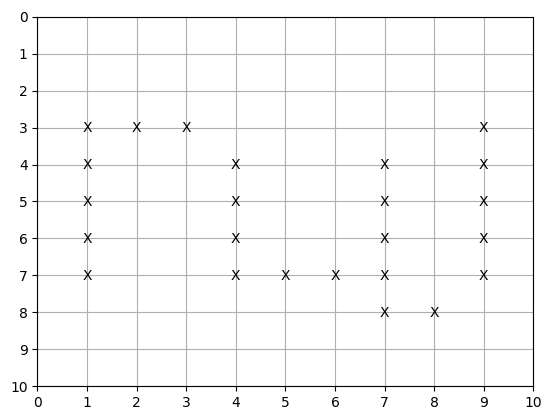

In [102]:
# Plot the coordinates on a 10x10 grid
grid_size = 11
grid = [[' ' for _ in range(grid_size)] for _ in range(grid_size)]

for row, col in list_of_cords:
    grid[row][col] = 'X'

fig, ax = plt.subplots()
ax.set_xticks(range(grid_size))
ax.set_yticks(range(grid_size))
ax.set_xticklabels(range(grid_size))
ax.set_yticklabels(range(grid_size))
ax.invert_yaxis()

# Plot each cell
for row in range(grid_size):
    for col in range(grid_size):
        ax.text(col, row, grid[row][col], va='center', ha='center')

plt.grid(True)
plt.show()

In [56]:
# # Extract the response text correctly
# segments_text = response.choices[0].message.content.strip()

# # Function to parse segments text into a list of list of tuples
# def parse_segments(segments_text):
#     # Use ast.literal_eval to safely parse the string into a list of list of tuples
#     return ast.literal_eval(segments_text)

# # Parse the segments
# segments = parse_segments(segments_text)

# # Plot the segments on a 10x10 grid
# grid_size = 10
# fig, ax = plt.subplots()
# ax.set_xticks(range(grid_size))
# ax.set_yticks(range(grid_size))
# ax.set_xticklabels(range(grid_size))
# ax.set_yticklabels(range(grid_size))
# ax.invert_yaxis()

# # Plot each segment
# for segment in segments:
#     x_coords = [point[1] for point in segment]  # Extract x coordinates
#     y_coords = [point[0] for point in segment]  # Extract y coordinates
#     ax.plot(x_coords, y_coords, 'ro-', linewidth=2)  # 'ro-' means red color, round markers, solid line

# # Display the grid
# plt.grid(True)
# plt.show()